# Distribution

## Netzwerktyp

Bei einem skalenfreien Netzwerk handelt es sich bei der Gradverteilung um ein Potenzgesetz.

In [2]:
%pylab inline
import powerlaw
print(powerlaw.__version__)

import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib
1.4.4


In [3]:
def plot_degree_histogram(deg, cnt): 
    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(deg,cnt,c='b',marker='.',s=15)

    plt.xlabel('Degree')
    plt.ylabel('Frequency')

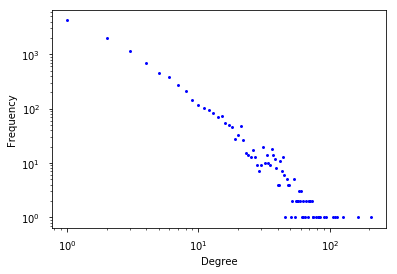

In [4]:
import networkx as nx
from collections import Counter
from scipy import stats

A = np.loadtxt('Data/arenas-pgp/out.arenas-pgp', dtype=int, usecols=range(2), comments="%")
G=nx.Graph()
for n in A:
    G.add_edge(n[0], n[1])
degree_sequence = sorted([degree for node, degree in G.degree()], reverse=True) 
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plot_degree_histogram(deg, cnt)

In [11]:
def average_degree(G):
    return 2 * G.number_of_edges() / G.number_of_nodes()

def moment(graph_data,n):
    degree_per_node = nx.degree(graph_data)

    val = 0
    for deg in degree_per_node:
         val += deg[1] ** n

    return val / float(nx.number_of_nodes(graph_data))

avg_deg = average_degree(G)
number_of_nodes = nx.number_of_nodes(G)
number_of_edges= nx.number_of_edges(G)
highest_degree = degree_sequence[0]
lowest_degree = degree_sequence[len(degree_sequence)-1]
avg_clustering = nx.average_clustering(G)
diameter = nx.diameter(G)

print("Number of Nodes: " + str(number_of_nodes))
print("Number of Edges: " + str(number_of_edges))
print("avg degree: " + str(avg_deg))
print("1st moment: " + str(moment(G, 1)))
print("2nd moment: " + str(moment(G, 2)))
print("3rd moment: " + str(moment(G, 3)))
print("highest degree: " + str(highest_degree))
print("lowest degree: " + str(lowest_degree))
print("average clustering coefficient: " + str(avg_clustering))
print("diameter: " + str(diameter))

Number of Nodes: 10680
Number of Edges: 24316
avg degree: 4.5535580524344565
1st moment: 4.5535580524344565
2nd moment: 85.97621722846442
3rd moment: 4462.983333333334
highest degree: 205
lowest degree: 1
average clustering coefficient: 0.2659452243010437
diameter: 24


### estimating alpha

Eine einfache Schätzung für Alpha kann erreicht werden, in dem eine Gerade an Pk in einem log-log Plot gefittet wird. Dieser Ansatz hat jedoch den Nachteil systematische Fehlern zuzulassen, was in einer fehlerhaften Schätzung resultiert.

Statistische Methoden: TODO

In [8]:
fit = powerlaw.Fit(cnt)
print(fit.power_law.alpha)
print(fit.power_law.sigma)
print(fit.power_law.xmin)
print(fit.distribution_compare('power_law', 'exponential'))

1.699668551364584
0.16051497417745886
46.0
(11.178641906212746, 0.03562829308960729)


Calculating best minimal value for power law fit


Text(0.5, 0, 'Degree')

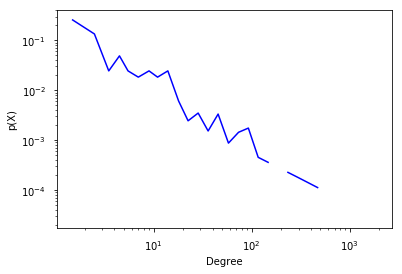

In [11]:
#probability density function (PDF)
figPDF = powerlaw.plot_pdf(cnt, color='b')
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Degree")

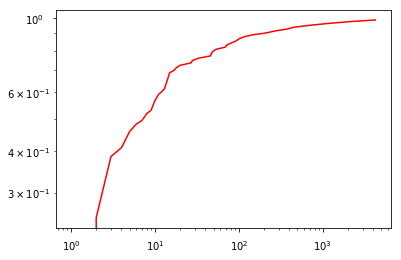

In [22]:
#cumulative distribution function (CDF)
powerlaw.plot_cdf(cnt, color="r")

Text(0.5, 0, 'Degree')

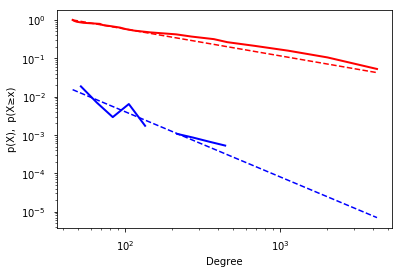

In [12]:
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"Degree")


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha no x max: 
1.3501760734254842
alpha with x max: 
1.2898996421425264


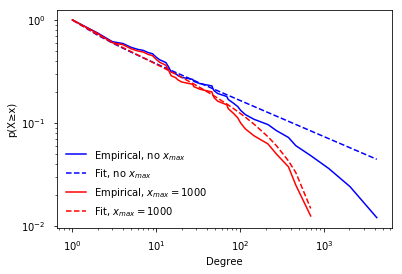

In [21]:
#no x max
fit = powerlaw.Fit(cnt, discrete=True, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
print("alpha no x max: ")
print(fit.power_law.alpha)

#with x max
fit = powerlaw.Fit(cnt, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")
print("alpha with x max: ")
print(fit.power_law.alpha)

FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Degree")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)

Analyse CA Subgraph

In [11]:
import community
import networkx as nx
import matplotlib.pyplot as plt

# Compute the partition of the graph nodes which maximises the modularity (or try..) 
# using the Louvain heuristices
# This is the partition of highest modularity, i.e. the highest partition of the dendrogram 
# generated by the Louvain algorithm.
partition = community.best_partition(G)
print(partition)
modularity = community.modularity(partition, G)
print("modularity: "+ str(modularity))

{1: 0, 2: 0, 617: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 26: 1, 1251: 1, 1266: 1, 1272: 1, 1299: 1, 1300: 1, 1301: 1, 1313: 1, 1408: 1, 1470: 1, 1530: 1, 1533: 1, 1537: 1, 1540: 1, 1548: 1, 1613: 1, 1933: 1, 1934: 1, 1935: 1, 1936: 1, 1937: 1, 1938: 1, 1939: 1, 1940: 1, 1941: 1, 1942: 1, 1943: 1, 1944: 1, 1945: 1, 1947: 1, 1948: 1, 1950: 1, 1951: 1, 1952: 1, 1953: 1, 1954: 1, 1955: 1, 1956: 1, 1957: 1, 1958: 1, 2582: 1, 2838: 1, 4041: 1, 4045: 1, 5737: 1, 8335: 1, 5828: 2, 1274: 1, 1293: 1, 1294: 1, 1295: 1, 1785: 1, 2713: 1, 2716: 1, 2719: 1, 2720: 1, 6236: 1, 6237: 1, 6239: 1, 1269: 1, 9145: 1, 9852: 3, 9945: 1, 8: 4, 9: 4, 10: 4, 4613: 4, 1744: 4, 11: 5, 12: 5, 13: 5, 338: 1, 1283: 1, 7352: 5, 7353: 5, 7558: 5, 7559: 5, 7560: 5, 7561: 5, 7562: 5, 14: 6, 15: 6, 16: 6, 17: 6, 18: 6, 8709: 6, 773: 6, 8337: 6, 8710: 6, 9318: 6, 6796: 6, 19: 6, 20: 6, 697: 6, 21: 7, 22: 7, 9879: 7, 23: 8, 24: 8, 25: 8, 27: 8, 28: 8, 29: 8, 30: 8, 31: 8, 32: 8, 33: 8, 34: 8, 35: 8, 36: 8, 37: 8, 38: 8, 39: 8, 4

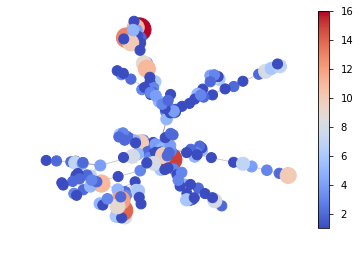

In [153]:
communities = {}
for key, value in sorted(partition.items()):
    communities.setdefault(value, []).append(key)

for m, nodes in communities.items():
    H = G.subgraph(nodes)
    s = list([100+degree ** 2.2 for node, degree in G.degree(nodes)])
    degrees = {}
    for node, degree in G.degree(nodes):
        degrees[node] = degree
    plt.gcf().clear()
    #nx.draw(H,pos=nx.spring_layout(H), node_color=list(degrees.values()), node_size=s, cmap=plt.cm.tab20)
    pos=nx.spring_layout(H, scale=5.0, iterations=500)

    cm = plt.cm.coolwarm
    ec = nx.draw_networkx_edges(H, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(H, pos, nodelist=H.nodes(), node_color=list(degrees.values()), 
                            with_labels=False, node_size=s, cmap=cm)
    
    plt.colorbar(nc)

    plt.axis('off')
    plt.savefig("output/"+str(m)+'.png', bbox_inches='tight')


## Links
- http://nbviewer.jupyter.org/github/jeffalstott/powerlaw/blob/master/manuscript/Manuscript_Code.ipynb
- https://scipy-cookbook.readthedocs.io/items/FittingData.html
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3906378/
- https://github.com/jeffalstott/powerlaw
- https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.powerlaw.html